In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
from numpy import median
import warnings
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel(r'Data.xlsx','Master Apr to Mar\'13',index_col=0,skiprows=1)
df.drop(df.iloc[:, 18:], inplace = True, axis = 1)
df['DOJ']= pd.to_datetime(df['DOJ']) 
df['In Active Date']=pd.to_datetime(df['In Active Date'])
df['In Active Date']=pd.DatetimeIndex(df['In Active Date']).month
df['DOJ'] = pd.DatetimeIndex(df['DOJ']).month

df.drop(['Designation','EmpID','Emp Name','Location','Attrition '],inplace=True, axis=1)
df["Zone"]= df["Zone"].str.lower() 
df['Tenure']=df['Tenure'].str.replace(" ","")
df['Tenure']=df['Tenure'].astype('float')
df_copy=df.copy()
df

,DOJ,Grade,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
S.No,,,,,,,,,,,,,
1,11,E1,5,1.60,Female,Bachelors,27,4,25535,0.021419,Divorced,west,Issues with the Manager
2,7,M2,4,1.90,Male,MBA,36,2,52155,0.448272,Single,south,More Challenging Job Roles/ Higher designation
3,10,E1,4,1.50,Male,Bachelors,24,4,26438,0.184461,Divorced,central,Issues with the Manager
4,5,M1,4,3.11,Male,Bachelors,33,2,54311,0.818786,Single,west,Lack of Growth
5,3,E1,4,2.10,Male,Bachelors,24,4,26702,0.493173,Divorced,north,Issues with the Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,5,M1,3,4.90,Male,Bachelors,37,2,53841,0.686943,Divorced,south,Lack of Growth
324,9,E1,3,0.50,Male,Bachelors,25,3,25813,0.109362,Married,south,Lack of Growth
325,12,E2,3,7.30,Male,Bachelors,28,1,36498,0.114816,Divorced,south,Lack of Growth



Several things we can check before doing some visualization on the features:

Is there any unavailable data (or null) in the data set?
Is there any columns with singular values?
I have built the function to do this, however, you can use data_df.isnull().sum() which will return the sum of null rows on each column.

## Checking for Null Values

In [3]:
print(df.isnull().sum())

DOJ                                  0
Grade                                0
In Active Date                       0
Tenure                               0
Gender                               0
Education                            0
Age                                  0
Last Rating                          0
Monthly Income                       0
Engagement Score (% Satisfaction)    0
Marital Status                       0
Zone                                 0
Remarks                              0
dtype: int64


In [4]:
df['Remarks'].unique()

array(['Issues with the Manager',
       'More Challenging Job Roles/ Higher designation', 'Lack of Growth',
       'Better Salary', 'Absconding', 'Termination - Theft',
       'Reasons not known', 'Higher education', 'Health Reasons',
       'Termination - Poor Performance'], dtype=object)

In [5]:
display(df.head(5))

,DOJ,Grade,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
S.No,,,,,,,,,,,,,
1,11,E1,5,1.60,Female,Bachelors,27,4,25535,0.021419,Divorced,west,Issues with the Manager
2,7,M2,4,1.90,Male,MBA,36,2,52155,0.448272,Single,south,More Challenging Job Roles/ Higher designation
3,10,E1,4,1.50,Male,Bachelors,24,4,26438,0.184461,Divorced,central,Issues with the Manager
4,5,M1,4,3.11,Male,Bachelors,33,2,54311,0.818786,Single,west,Lack of Growth
5,3,E1,4,2.10,Male,Bachelors,24,4,26702,0.493173,Divorced,north,Issues with the Manager


## Count Plot on the Grade

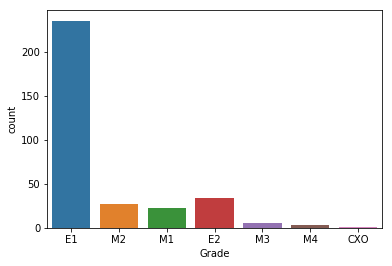

In [6]:
sns.countplot(x='Grade',data=df)

From this we infer that majority of the employees which are leaving are of grade E1 

# Categorized the Tenure 

We categorize the tenure into 4 classes : 0-1 years, 1-2 years, 2-3 years and above 3 years

In [7]:
df_copy['Tenure']=pd.cut(df_copy['Tenure'], bins=[0, 1, 2,3,1000], include_lowest=True,labels=['0-1', '1-2', '2-3','Above 3'])
df_copy.head(5)

,DOJ,Grade,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
S.No,,,,,,,,,,,,,
1,11,E1,5,1-2,Female,Bachelors,27,4,25535,0.021419,Divorced,west,Issues with the Manager
2,7,M2,4,1-2,Male,MBA,36,2,52155,0.448272,Single,south,More Challenging Job Roles/ Higher designation
3,10,E1,4,1-2,Male,Bachelors,24,4,26438,0.184461,Divorced,central,Issues with the Manager
4,5,M1,4,Above 3,Male,Bachelors,33,2,54311,0.818786,Single,west,Lack of Growth
5,3,E1,4,2-3,Male,Bachelors,24,4,26702,0.493173,Divorced,north,Issues with the Manager


# Analysis based on Tenure

## Tenure vs Grade Attrition(by %)

In [8]:
Cm_Tenure_Grade = pd.crosstab(df_copy['Grade'], df_copy['Tenure'],rownames=['Grade'], colnames=['Tenure'])
Cmn_Tenure_Grade = (Cm_Tenure_Grade.astype('float') / Cm_Tenure_Grade.sum(axis=1)[:, np.newaxis])*100
Cmn_Tenure_Grade

Tenure,0-1,1-2,2-3,Above 3
Grade,,,,
CXO,0.000000,100.000000,0.000000,0.000000
E1,43.829787,25.957447,17.446809,12.765957
E2,8.823529,8.823529,2.941176,79.411765
M1,40.909091,0.000000,9.090909,50.000000
M2,74.074074,14.814815,3.703704,7.407407
M3,40.000000,0.000000,20.000000,40.000000
M4,0.000000,0.000000,33.333333,66.666667


From this, we infer that majority of E1 and M1 employees are leaving within a year. This factor should be taken into consideration during recruitment.

## Tenure vs Gender Attrition(by %)

In [9]:
Cm_Tenure_Gender=pd.crosstab(df_copy['Gender'], df_copy['Tenure'],rownames=['Gender'], colnames=['Tenure'])
Cmn_Tenure_Gender = (Cm_Tenure_Gender.astype('float') / Cm_Tenure_Gender.sum(axis=1)[:, np.newaxis])*100
Cmn_Tenure_Gender=Cmn_Tenure_Gender.astype(int)

Cmn_Tenure_Gender
# Cm_Tenure_Gender

Tenure,0-1,1-2,2-3,Above 3
Gender,,,,
Female,16,27,16,38
Male,43,20,14,21


From this we infer that average tenure of females are more than male employees

## Tenure vs Remarks Attrition(by %)

In [10]:
Cm_Tenure_Remarks=pd.crosstab(df_copy['Remarks'], df_copy['Tenure'],rownames=['Remarks'], colnames=['Tenure'])
Cmn_Tenure_Remarks = (Cm_Tenure_Remarks.astype('float') / Cm_Tenure_Remarks.sum(axis=1)[:, np.newaxis])*100

Cmn_Tenure_Remarks

Tenure,0-1,1-2,2-3,Above 3
Remarks,,,,
Absconding,62.500000,0.000000,12.500000,25.000000
Better Salary,47.368421,5.263158,26.315789,21.052632
Health Reasons,25.000000,50.000000,0.000000,25.000000
Higher education,66.666667,33.333333,0.000000,0.000000
Issues with the Manager,42.068966,25.517241,15.862069,16.551724
Lack of Growth,34.375000,23.958333,9.375000,32.291667
More Challenging Job Roles/ Higher designation,41.935484,12.903226,16.129032,29.032258
Reasons not known,100.000000,0.000000,0.000000,0.000000
Termination - Poor Performance,53.846154,0.000000,23.076923,23.076923


## Last Rating vs Tenure Attrition for E1 Grades(by %)

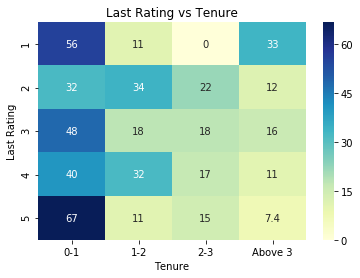

In [11]:
E1_copy=df_copy[df_copy.Grade=='E1']
Cm_Tenure_Rating=pd.crosstab(E1_copy['Last Rating'], E1_copy['Tenure'],rownames=['Last Rating'], colnames=['Tenure'])
Cmn_Tenure_Rating = (Cm_Tenure_Rating.astype('float') / Cm_Tenure_Rating.sum(axis=1)[:, np.newaxis])*100
# Cmn_Tenure_Gender=Cmn_Tenure_Gender.astype(int)
plt.title('Last Rating vs Tenure')
sns.heatmap(Cmn_Tenure_Rating,annot=True,cmap="YlGnBu")

# Analysis based on Zone

## Zone vs Remarks Attrition(by %)

In [12]:
Cm = pd.crosstab(df['Zone'], df['Remarks'],rownames=['Zone'], colnames=['Remarks'])
Cmn = (Cm.astype('float') / Cm.sum(axis=1)[:, np.newaxis])*100
Cmn

Remarks,Absconding,Better Salary,Health Reasons,Higher education,Issues with the Manager,Lack of Growth,More Challenging Job Roles/ Higher designation,Reasons not known,Termination - Poor Performance,Termination - Theft
Zone,,,,,,,,,,
central,3.448276,0.000000,0.000000,6.896552,44.827586,24.137931,6.896552,3.448276,3.448276,6.896552
east,1.724138,0.000000,1.724138,0.000000,55.172414,31.034483,1.724138,1.724138,5.172414,1.724138
ho,0.000000,0.000000,0.000000,0.000000,17.647059,23.529412,52.941176,0.000000,0.000000,5.882353
north,4.166667,8.333333,0.000000,0.000000,52.777778,25.000000,5.555556,0.000000,2.777778,1.388889
south,1.000000,13.000000,2.000000,1.000000,38.000000,27.000000,12.000000,0.000000,5.000000,1.000000
west,3.921569,0.000000,1.960784,0.000000,41.176471,43.137255,5.882353,0.000000,3.921569,0.000000


## Zone vs Tenure Attrition(by %)

In [13]:
Cm_Tenure_Zone=pd.crosstab(df_copy['Zone'], df_copy['Tenure'],rownames=['Zone'], colnames=['Tenure'])
Cmn_Tenure_Zone = (Cm_Tenure_Zone.astype('float') / Cm_Tenure_Zone.sum(axis=1)[:, np.newaxis])*100
Cmn_Tenure_Zone=Cmn_Tenure_Zone.astype(int)

Cmn_Tenure_Zone

Tenure,0-1,1-2,2-3,Above 3
Zone,,,,
central,44,24,17,13
east,34,29,10,25
ho,35,17,11,35
north,50,19,16,13
south,35,14,19,32
west,52,27,5,13


## Zone vs  Grade Attrition

In [14]:
Cm_Grade_Zone=pd.crosstab(df_copy['Zone'], df_copy['Grade'],rownames=['Zone'], colnames=['Grade'])
Cmn_Grade_Zone = (Cm_Grade_Zone.astype('float') / Cm_Grade_Zone.sum(axis=1)[:, np.newaxis])*100

Cmn_Grade_Zone

Grade,CXO,E1,E2,M1,M2,M3,M4
Zone,,,,,,,
central,0.000000,79.310345,3.448276,10.344828,6.896552,0.000000,0.000000
east,0.000000,77.586207,15.517241,3.448276,3.448276,0.000000,0.000000
ho,5.882353,11.764706,23.529412,17.647059,0.000000,29.411765,11.764706
north,0.000000,84.722222,8.333333,5.555556,1.388889,0.000000,0.000000
south,0.000000,69.000000,9.000000,6.000000,15.000000,0.000000,1.000000
west,0.000000,68.627451,9.803922,7.843137,13.725490,0.000000,0.000000


# Frequency of Attrition vs Month

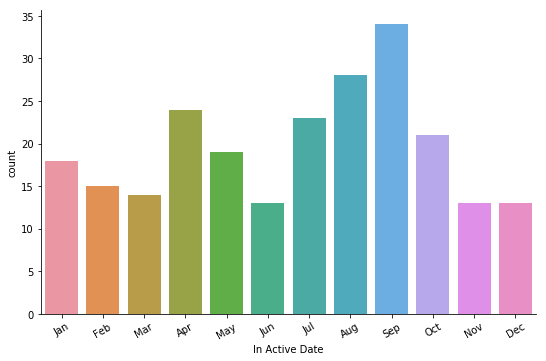

In [15]:
date_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 
               4: 'Apr',5:'May', 6: 'Jun', 7:'Jul' ,8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
E1_copy['In Active Date'] = E1_copy['In Active Date'].map(date_map)
orders=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
g = sns.factorplot("In Active Date", data=E1_copy, aspect=1.5, kind="count",order=orders)
g.set_xticklabels(rotation=30)


The number of workers leaving reach the maximum around September(September and October).
We can introduce Diwali bonus prior during this
duration to retain them

# Encoding The Categorized Attributes

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# number=LabelEncoder
grade_map = {'E1': 0, 'E2': 1, 'M1': 2, 
               'M2': 3, 'M3': 4, 'M4': 5 ,'CXO':6}
df['Grade'] = df['Grade'].map(grade_map)

df['Gender']=le.fit_transform(df['Gender'])

education_map={'Bachelors':0 , 'MBA':1}
df['Education']=df['Education'].map(education_map)


zone_map={'north':0, 'south':1,'east':2,'west':3,'central':4,'ho':1}
df['Zone']=df['Zone'].map(zone_map)

df['Marital Status']=df['Marital Status'].str.replace(" ","")
martial_status={'Single': 0,'Married':2 , 'Divorced': 1}
df['Marital Status']=df['Marital Status'].map(martial_status)

remarks={'Termination - Poor Performance':0,'Termination - Theft':1, 'Reasons not known':3,'Absconding':2,'Better Salary':9,'Higher education':7,'Health Reasons':4,'More Challenging Job Roles/ Higher designation':5,'Issues with the Manager':8,'Lack of Growth':6}
df['Remarks']=df['Remarks'].map(remarks)
df

,DOJ,Grade,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
S.No,,,,,,,,,,,,,
1,11,0,5,1.60,0,0,27,4,25535,0.021419,1,3,8
2,7,3,4,1.90,1,1,36,2,52155,0.448272,0,1,5
3,10,0,4,1.50,1,0,24,4,26438,0.184461,1,4,8
4,5,2,4,3.11,1,0,33,2,54311,0.818786,0,3,6
5,3,0,4,2.10,1,0,24,4,26702,0.493173,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,5,2,3,4.90,1,0,37,2,53841,0.686943,1,1,6
324,9,0,3,0.50,1,0,25,3,25813,0.109362,2,1,6
325,12,1,3,7.30,1,0,28,1,36498,0.114816,1,1,6


In [17]:
df=df.astype('float')

# Correlation Matrix 

In [18]:
df.corr()


,DOJ,Grade,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
DOJ,1.000000,0.015203,-0.014275,0.223226,0.029477,0.028035,0.019556,-0.042463,0.057563,-0.011729,0.073962,-0.002723,-0.049627
Grade,0.015203,1.000000,0.086149,0.158784,-0.058110,0.605344,0.905944,-0.022713,0.853251,0.074008,-0.030445,0.004217,-0.211967
In Active Date,-0.014275,0.086149,1.000000,0.033013,0.023702,0.014858,0.106634,0.150213,0.085434,0.030084,-0.049599,0.020294,0.167450
Tenure,0.223226,0.158784,0.033013,1.000000,-0.053867,0.033902,0.126795,-0.122294,0.128781,-0.036733,0.057040,-0.063753,-0.053539
Gender,0.029477,-0.058110,0.023702,-0.053867,1.000000,-0.000539,0.007297,-0.024194,-0.024708,0.002179,-0.002770,0.006855,-0.043573
Education,0.028035,0.605344,0.014858,0.033902,-0.000539,1.000000,0.545980,-0.040443,0.527152,0.032826,-0.014003,-0.039342,-0.120201
Age,0.019556,0.905944,0.106634,0.126795,0.007297,0.545980,1.000000,-0.000934,0.797063,0.070206,-0.040506,0.037371,-0.189609
Last Rating,-0.042463,-0.022713,0.150213,-0.122294,-0.024194,-0.040443,-0.000934,1.000000,-0.039690,-0.021186,0.057860,-0.043188,0.091630
Monthly Income,0.057563,0.853251,0.085434,0.128781,-0.024708,0.527152,0.797063,-0.039690,1.000000,0.058930,0.015011,-0.004747,-0.170096
Engagement Score (% Satisfaction),-0.011729,0.074008,0.030084,-0.036733,0.002179,0.032826,0.070206,-0.021186,0.058930,1.000000,0.027299,-0.036740,-0.061535


# Analysis based on Grade

In [19]:
#Based on Grade
E1=df[df.Grade==0]
E1.drop(['Grade'],inplace=True,axis=1)

E2=df[df.Grade==1]
E2.drop(['Grade'],inplace=True,axis=1)

M1=df[df.Grade==2]
M1.drop(['Grade'],inplace=True,axis=1)

M2=df[df.Grade==3]
M2.drop(['Grade'],inplace=True,axis=1)

M3=df[df.Grade==4]
M3.drop(['Grade'],inplace=True,axis=1)

M4=df[df.Grade==5]
M4.drop(['Grade'],inplace=True,axis=1)

CX0=df[df.Grade==6]
CX0.drop(['Grade'],inplace=True,axis=1)


# Probability Distribution of Major Features

In [20]:
print(df['Zone'].unique())

[3. 1. 4. 0. 2.]


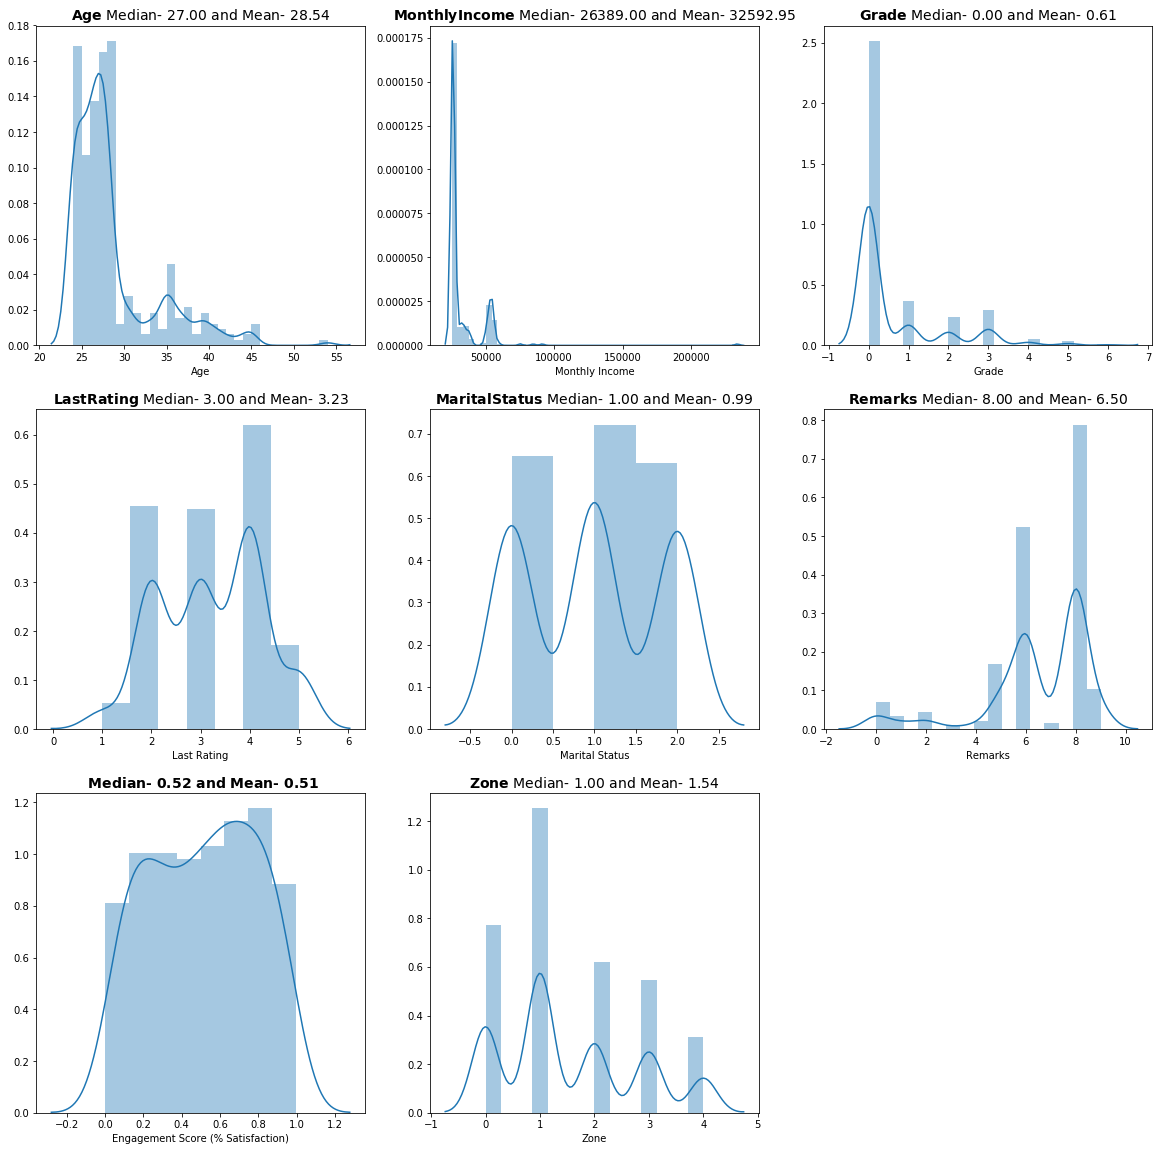

In [21]:
f,axes=plt.subplots(3,3,figsize=(20,20))
df['Zone'].unique
sns.distplot(df['Age'],ax=axes[0,0]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Age', median(df['Age']), df['Age'].mean()),
              size=14)
sns.distplot(df['Monthly Income'],ax=axes[0,1]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Monthly Income', median(df['Monthly Income']), df['Monthly Income'].mean()),
              size=14)
sns.distplot(df['Grade'],ax=axes[0,2]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Grade', median(df['Grade']), df['Grade'].mean()),
              size=14)
sns.distplot(df['Last Rating'],ax=axes[1,0]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Last Rating', median(df['Last Rating']), df['Last Rating'].mean()),
              size=14)
sns.distplot(df['Marital Status'],ax=axes[1,1]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Marital Status', median(df['Marital Status']), df['Marital Status'].mean()),
              size=14)
sns.distplot(df['Remarks'],ax=axes[1,2]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Remarks', median(df['Remarks']), df['Remarks'].mean()),
              size=14)
sns.distplot(df['Engagement Score (% Satisfaction)'],ax=axes[2,0]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Engagement Score (% Satisfaction)', median(df['Engagement Score (% Satisfaction)']), df['Engagement Score (% Satisfaction)'].mean()),
              size=14)

sns.distplot(df['Zone'],ax=axes[2,1]).set_title(r'$\bf{%s}$ Median- %.2f and Mean- %.2f' % \
              ('Zone', median(df['Zone']), df['Zone'].mean()),
              size=14)
f.delaxes(axes[2][2])


# Gender wise Probability Distribution of Monthly Income 

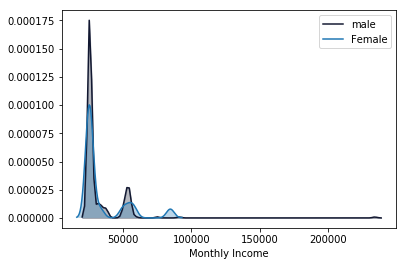

In [22]:
fmale=df[df.Gender==0]
fmale.drop(['Gender'],inplace=True,axis=1)
male=df[df.Gender==1]


ax=sns.distplot(male['Monthly Income'],color="#121831",hist=False,label='male')
ax=sns.distplot(fmale['Monthly Income'],hist=False,label='Female')
L=ax.lines
ax.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='#121831',alpha=0.3)
ax.fill_between(L[1].get_xydata()[0:,0],L[1].get_xydata()[0:,1],alpha=0.3)


Females at the E1 designation are getting less pay
than their male counterparts as shown in the graph.

# Gender wise Probability Distribution of Monthly Income for E1 Grade

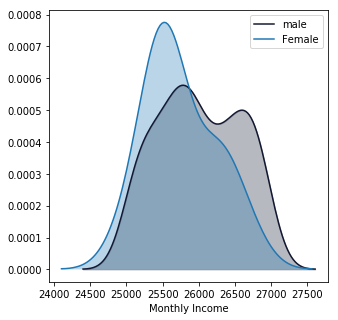

In [23]:
fmale=E1[E1.Gender==0]
fmale.drop(['Gender'],inplace=True,axis=1)
male=E1[E1.Gender==1]
male.drop(['Gender'],inplace=True,axis=1)
plt.figure(figsize=(5, 5))
ax=sns.distplot(male['Monthly Income'],color="#121831",hist=False,label='male')
ax=sns.distplot(fmale['Monthly Income'],hist=False,label='Female')
L=ax.lines
ax.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='#121831',alpha=0.3)
ax.fill_between(L[1].get_xydata()[0:,0],L[1].get_xydata()[0:,1],alpha=0.3)

# Gender wise Probability Distribution of Tenure

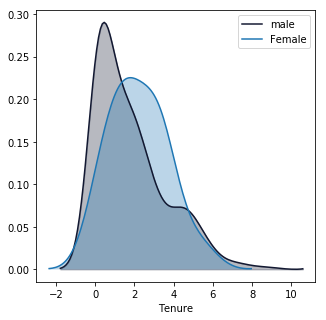

In [24]:
plt.figure(figsize=(5, 5))
    
fmale=df[df.Gender==0]
fmale.drop(['Gender'],inplace=True,axis=1)
male=df[df.Gender==1]
male.drop(['Gender'],inplace=True,axis=1)
ax=sns.distplot(male['Tenure'],color="#121831",hist=False,label='male')
ax=sns.distplot(fmale['Tenure'],hist=False,label='Female')
L=ax.lines
ax.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='#121831',alpha=0.3)
ax.fill_between(L[1].get_xydata()[0:,0],L[1].get_xydata()[0:,1],alpha=0.3)


# Grade Wise Probability Distribution of Satisfaction Score 

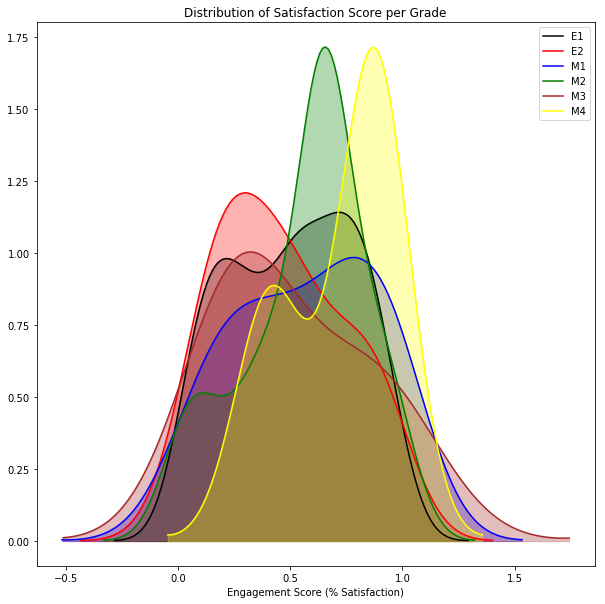

In [25]:
#satisfacion score
# f,axes=plt.subplots(2,3,figsize=(12,12),sharex=True)
plt.figure(figsize=(10, 10))

sns.distplot(E1['Engagement Score (% Satisfaction)'],color="black",hist=False,label='E1').set_title('Distribution of Satisfaction Score per Grade')
sns.distplot(E2['Engagement Score (% Satisfaction)'],color="red",hist=False, label='E2')
sns.distplot(M1['Engagement Score (% Satisfaction)'],color="blue",hist=False,label='M1')
sns.distplot(M2['Engagement Score (% Satisfaction)'],color="green",hist=False,label='M2')
sns.distplot(M3['Engagement Score (% Satisfaction)'],color="brown",hist=False,label='M3')
ax=sns.distplot(M4['Engagement Score (% Satisfaction)'],color="Yellow",hist=False,label='M4')
L=ax.lines
ax.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='black',alpha=0.3)
ax.fill_between(L[1].get_xydata()[0:,0],L[1].get_xydata()[0:,1],color='red',alpha=0.3)
ax.fill_between(L[2].get_xydata()[0:,0],L[2].get_xydata()[0:,1],color='blue',alpha=0.3)
ax.fill_between(L[3].get_xydata()[0:,0],L[3].get_xydata()[0:,1],color='green',alpha=0.3)
ax.fill_between(L[4].get_xydata()[0:,0],L[4].get_xydata()[0:,1],color='brown',alpha=0.3)
ax.fill_between(L[5].get_xydata()[0:,0],L[5].get_xydata()[0:,1],color='yellow',alpha=0.3)

# ax.fill_between(x1,y1, color="red", alpha=0.3)


# Grade Wise Probability distribution of Tenure 

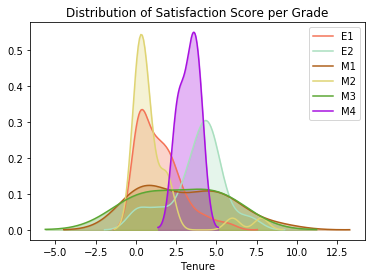

In [26]:
# plt.figure(figsize=(10, 10))

sns.distplot(E1['Tenure'],color="#F47357",hist=False,label='E1').set_title('Distribution of Satisfaction Score per Grade')
sns.distplot(E2['Tenure'],color="#A9DFBF",hist=False, label='E2')
sns.distplot(M1['Tenure'],color="#AF601A",hist=False,label='M1')
sns.distplot(M2['Tenure'],color="#DFD473",hist=False,label='M2')
sns.distplot(M3['Tenure'],color="#5BA733",hist=False,label='M3')
ax=sns.distplot(M4['Tenure'],color="#A710E0",hist=False,label='M4')
L=ax.lines
ax.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='#F47357',alpha=0.3)
ax.fill_between(L[1].get_xydata()[0:,0],L[1].get_xydata()[0:,1],color='#A9DFBF',alpha=0.3)
ax.fill_between(L[2].get_xydata()[0:,0],L[2].get_xydata()[0:,1],color='#AF601A',alpha=0.3)
ax.fill_between(L[3].get_xydata()[0:,0],L[3].get_xydata()[0:,1],color='#DFD473',alpha=0.3)
ax.fill_between(L[4].get_xydata()[0:,0],L[4].get_xydata()[0:,1],color='#5BA733',alpha=0.3)
ax.fill_between(L[5].get_xydata()[0:,0],L[5].get_xydata()[0:,1],color='#A710E0',alpha=0.3)

# Analysis based on Clustering

We had clustered employees based on their values and importance to the company and using that we can find the probable reasons for attrition for a particular cluster of employees and thereby take necessary steps for retaining important employees

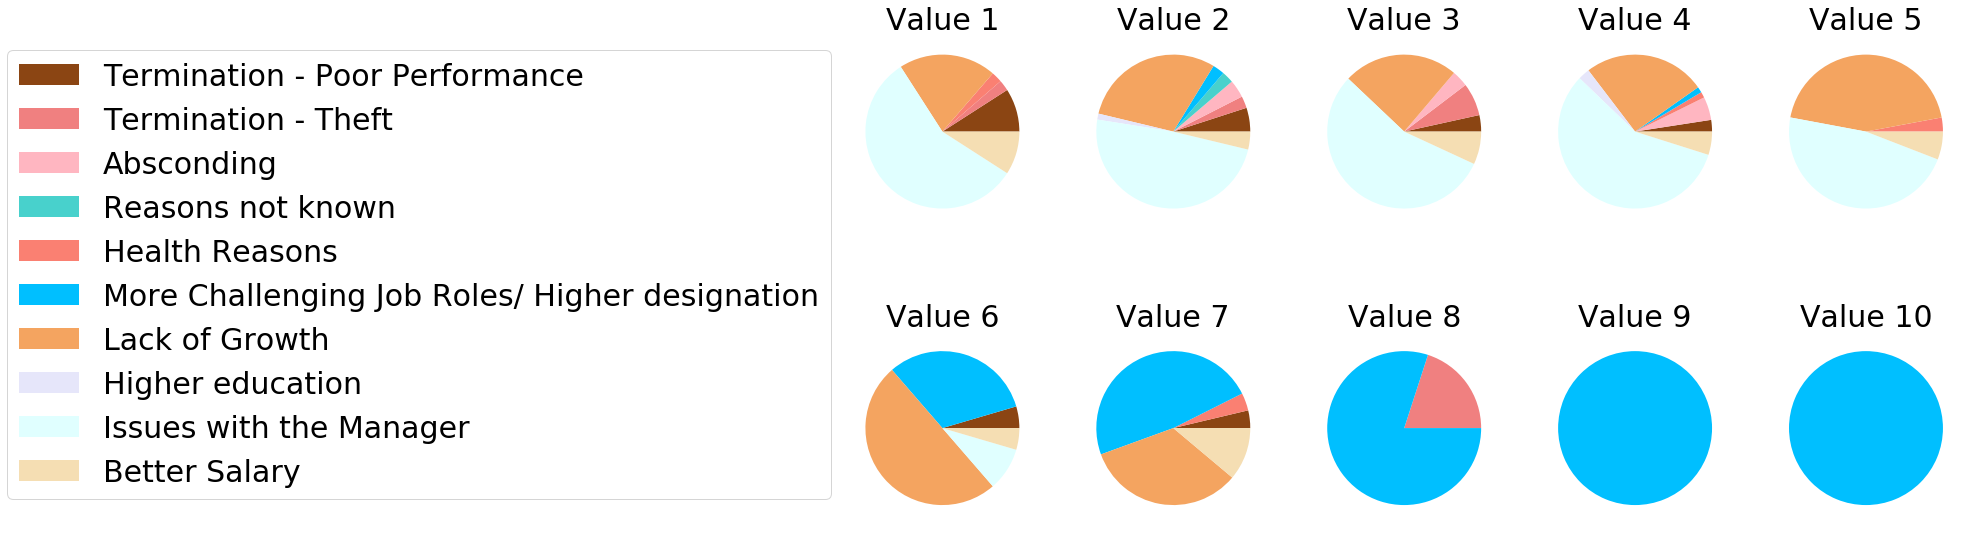

In [27]:
labels=['Termination - Poor Performance','Termination - Theft','Absconding','Reasons not known','Health Reasons','More Challenging Job Roles/ Higher designation','Lack of Growth','Higher education','Issues with the Manager','Better Salary']
clusters=pd.DataFrame([4,1,0,0,1,0,9,0,25,4],labels,)
clusters.insert(1, "Cluster 2", [4,2,3,2,0,2,24,1,39,3], True)
clusters.insert(2, "Cluster 3", [1,2,1,0,0,0,7,0,16,2], True)
clusters.insert(3, "Cluster 4", [2,0,4,0,1,1,21,2,47,4], True)
clusters.insert(4, "Cluster 5", [0,0,0,0,1,0,15,0,16,2], True)
clusters.insert(5, "Cluster 6", [1,0,0,0,0,7,11,0,2,1], True)
clusters.insert(6, "Cluster 7", [1,0,0,0,1,13,9,0,0,3], True)
clusters.insert(7, "Cluster 8", [0,1,0,0,0,4,0,0,0,0], True)
clusters.insert(8, "Cluster 9", [0,0,0,0,0,3,0,0,0,0], True)
clusters.insert(9, "Cluster 10",[0,0,0,0,0,1,0,0,0,0], True) 

fig, axs = plt.subplots(2,5,figsize=(20,10))
from matplotlib import cm
import random
import matplotlib.colors as mcolors
cs=random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)

axs[0,0].pie(clusters[0],colors=cs)
axs[0,0].set_title("Value 1",fontsize=30)
axs[0,1].pie(clusters['Cluster 2'],colors=cs)
axs[0,1].set_title("Value 2",fontsize=30)
axs[0,2].pie(clusters['Cluster 3'],colors=cs)
axs[0,2].set_title("Value 3",fontsize=30)
axs[0,3].pie(clusters['Cluster 4'],colors=cs)
axs[0,3].set_title("Value 4",fontsize=30)
axs[0,4].pie(clusters['Cluster 5'],colors=cs)
axs[0,4].set_title("Value 5",fontsize=30)
axs[1,0].pie(clusters['Cluster 6'],colors=cs)
axs[1,0].set_title("Value 6",fontsize=30)
axs[1,1].pie(clusters['Cluster 7'],colors=cs)
axs[1,1].set_title("Value 7",fontsize=30)
axs[1,2].pie(clusters['Cluster 8'],colors=cs)
axs[1,2].set_title("Value 8",fontsize=30)
axs[1,3].pie(clusters['Cluster 9'],colors=cs)
axs[1,3].set_title("Value 9",fontsize=30)
axs[1,4].pie(clusters['Cluster 10'],colors=cs)
axs[1,4].set_title("Value 10",fontsize=30)
axs[0,0].legend(labels,bbox_to_anchor=(0, 1),fontsize=30)


# Grade Wise Probability Distribution of InActive Month 

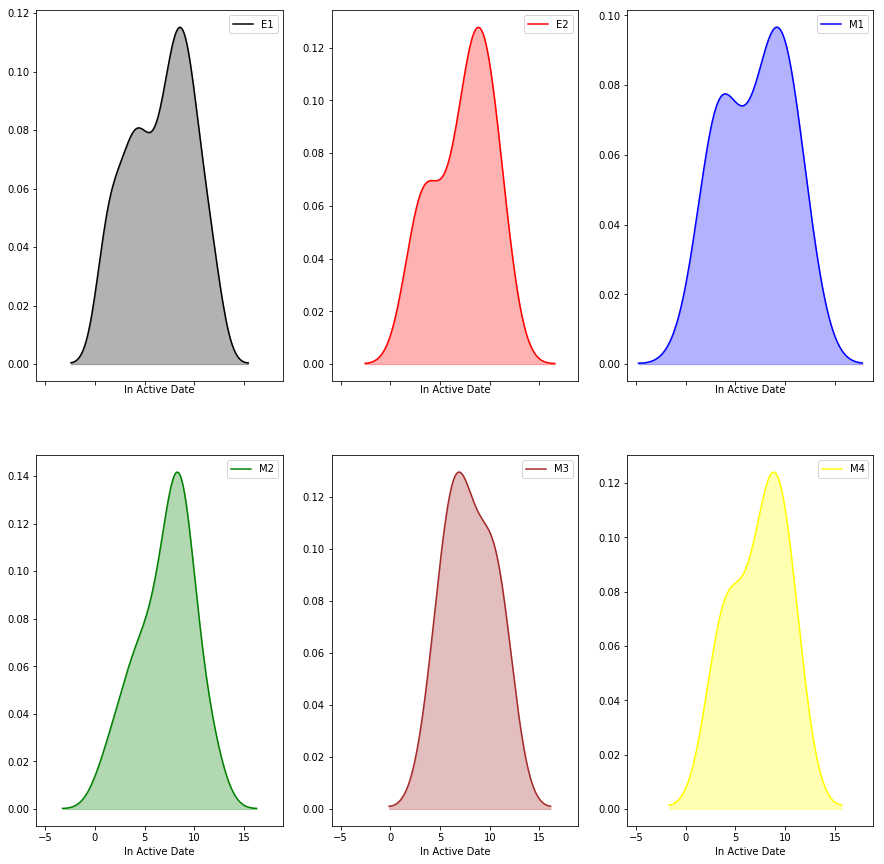

In [28]:
f,axes=plt.subplots(2,3,figsize=(15,15),sharex=True)
ax1=sns.distplot(E1['In Active Date'],ax=axes[0, 0],hist=False,color='black',label="E1")
L=ax1.lines
ax1.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='black',alpha=0.3)

ax2=sns.distplot(E2['In Active Date'],ax=axes[0, 1],hist=False,color='red',label="E2")
L=ax2.lines
ax2.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='red',alpha=0.3)

ax3=sns.distplot(M1['In Active Date'],ax=axes[0, 2],hist=False,color='blue',label="M1")
L=ax3.lines
ax3.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='blue',alpha=0.3)

ax4=sns.distplot(M2['In Active Date'],ax=axes[1, 0],hist=False,color='green',label="M2")
L=ax4.lines
ax4.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='green',alpha=0.3)

ax5=sns.distplot(M3['In Active Date'],ax=axes[1, 1],hist=False,color='brown',label="M3")
L=ax5.lines
ax5.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='brown',alpha=0.3)

ax6=sns.distplot(M4['In Active Date'],ax=axes[1, 2],hist=False,color='yellow',label="M4")
L=ax6.lines
ax6.fill_between(L[0].get_xydata()[0:,0],L[0].get_xydata()[0:,1],color='yellow',alpha=0.3)


# Grade Wise Correlation Maps 

Text(0.5, 1.0, 'M4')

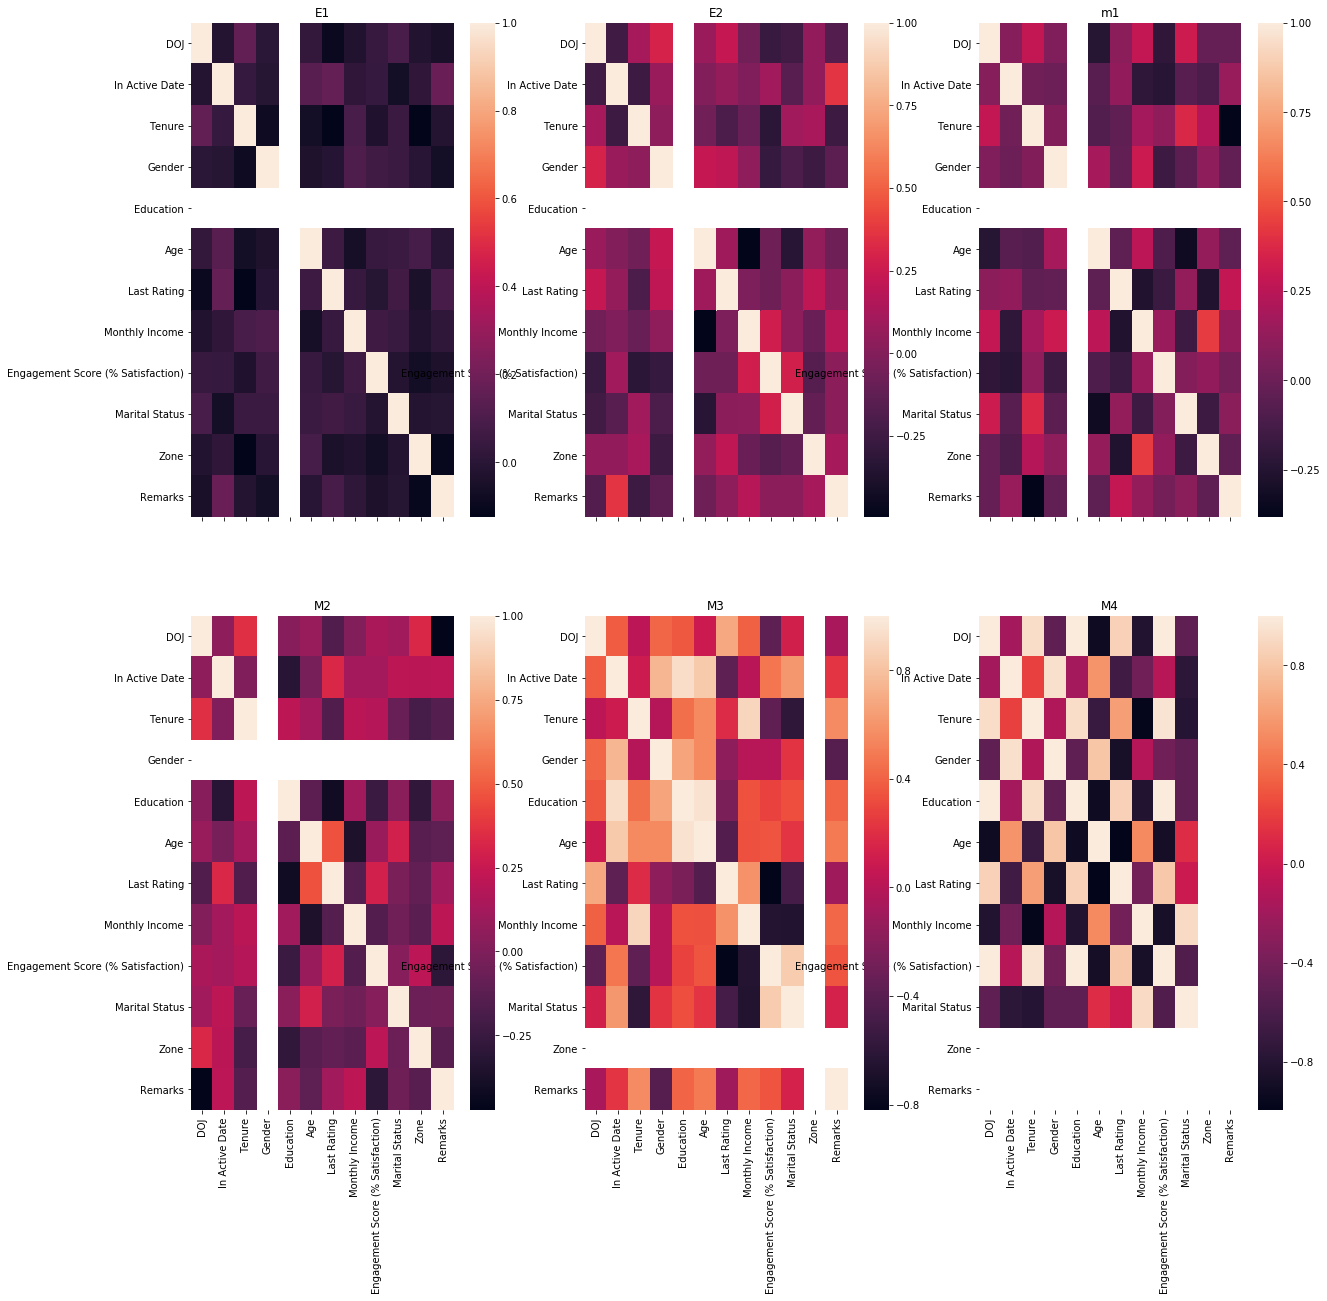

In [29]:
f,axes=plt.subplots(2,3,figsize=(20,20),sharex=True)
sns.heatmap(E1.corr(),ax=axes[0, 0]).set_title('E1')
sns.heatmap(E2.corr(),ax=axes[0, 1]).set_title('E2')
sns.heatmap(M1.corr(),ax=axes[0, 2]).set_title('m1')
sns.heatmap(M2.corr(),ax=axes[1, 0]).set_title('M2')
sns.heatmap(M3.corr(),ax=axes[1, 1]).set_title('M3')
sns.heatmap(M4.corr(),ax=axes[1, 2]).set_title('M4')


# Analysis on the basis of Reasons for Attrition

In [30]:
manager_issues=df[df.Remarks==8]
manager_issues.drop(['Remarks'],inplace=True,axis=1)

better_salary=df[df.Remarks==9]
better_salary.drop(['Remarks'],inplace=True,axis=1)

lack_growth=df[df.Remarks==6]
lack_growth.drop(['Remarks'],inplace=True,axis=1)

higher_Designation=df[df.Remarks==5]
higher_Designation.drop(['Remarks'],inplace=True,axis=1)

health_reasons=df[df.Remarks==4]
health_reasons.drop(['Remarks'],inplace=True,axis=1)

higher_education=df[df.Remarks==7]
higher_education.drop(['Remarks'],inplace=True,axis=1)

absconding=df[df.Remarks==2]
absconding.drop(['Remarks'],inplace=True,axis=1)


tpp=df[df.Remarks==0]
tpp.drop(['Remarks'],inplace=True,axis=1)


ttheft=df[df.Remarks==1]
ttheft.drop(['Remarks'],inplace=True,axis=1)


noreasons=df[df.Remarks==3]
noreasons.drop(['Remarks'],inplace=True,axis=1)

# H_D=df[df.Remarks=='More Challenging Job Roles/ Higher designation']
# H_D.drop(['Remarks'],inplace=True,axis=1)


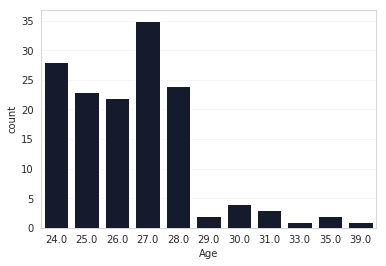

In [31]:
sns.set_style("whitegrid")
with sns.axes_style({'grid.color': "0.95", "lines.color" : "0.95"}):
    sns.countplot(manager_issues['Age'],color="#121831")

# Correlation Map between various features

Text(0.5, 1.0, 'Termination Due to Theft')

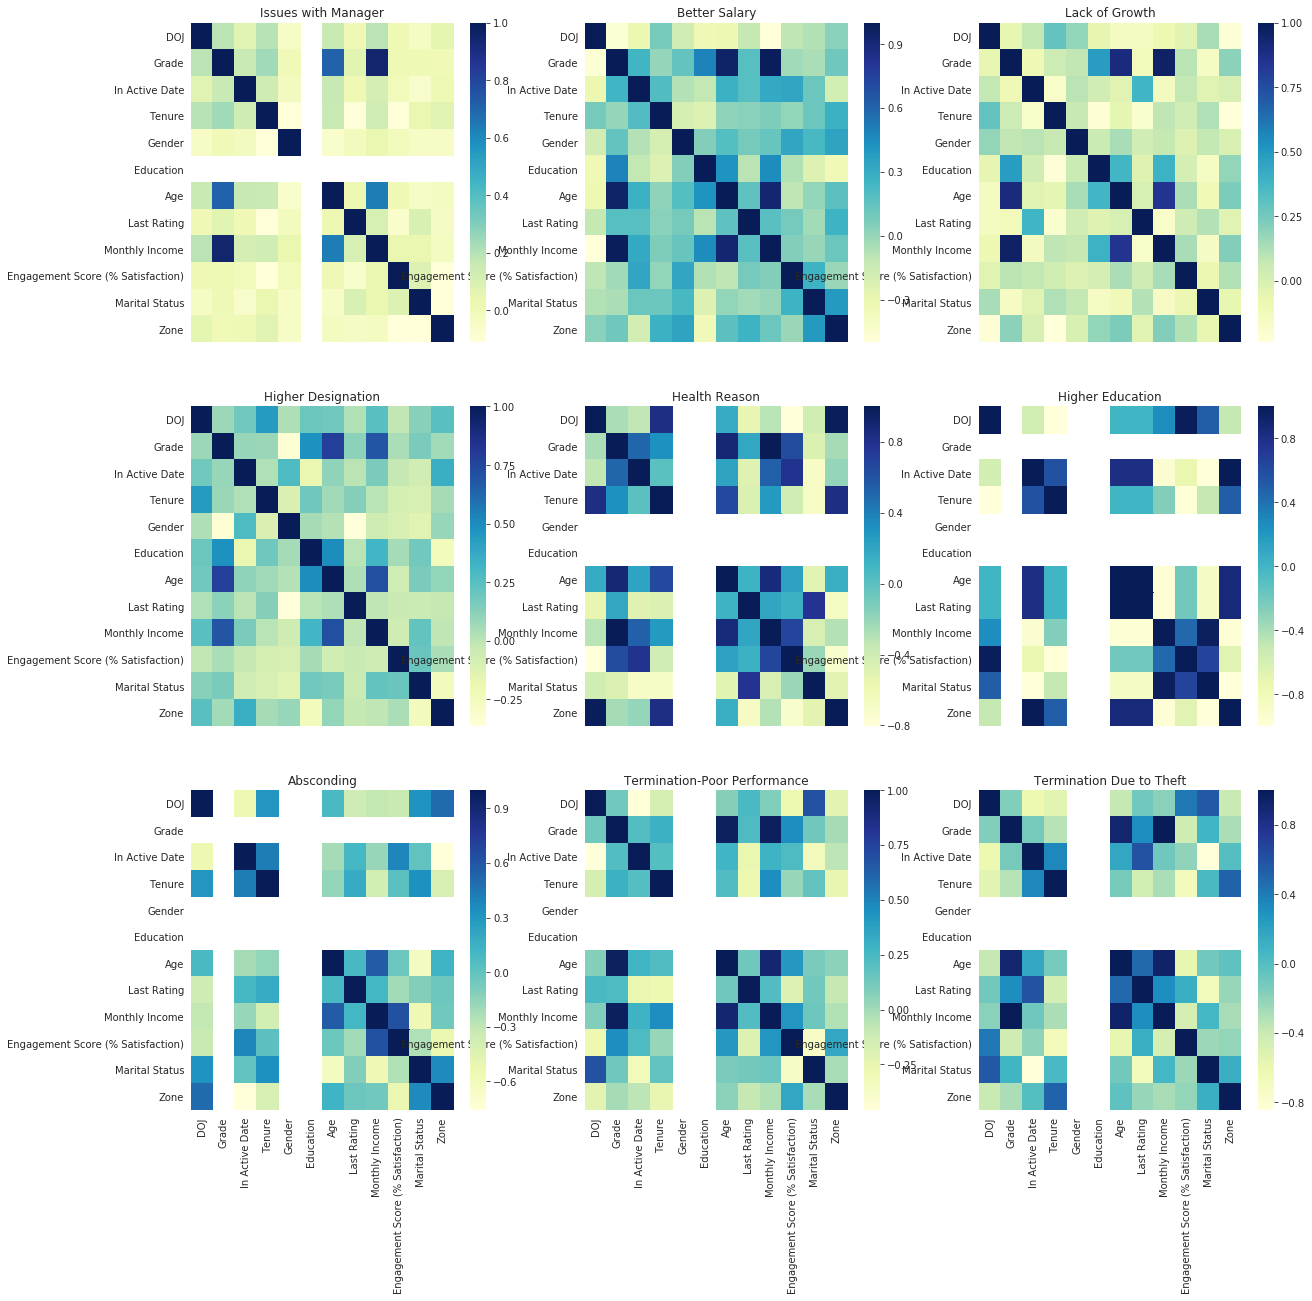

In [32]:
f,axes=plt.subplots(3,3,figsize=(20,20),sharex=True)
sns.heatmap(manager_issues.corr(),ax=axes[0, 0],cmap="YlGnBu").set_title('Issues with Manager')
sns.heatmap(better_salary.corr(),ax=axes[0, 1],cmap="YlGnBu").set_title('Better Salary')
sns.heatmap(lack_growth.corr(),ax=axes[0, 2],cmap="YlGnBu").set_title('Lack of Growth')
sns.heatmap(higher_Designation.corr(),ax=axes[1, 0],cmap="YlGnBu").set_title('Higher Designation')
sns.heatmap(health_reasons.corr(),ax=axes[1, 1],cmap="YlGnBu").set_title('Health Reason')
sns.heatmap(higher_education.corr(),ax=axes[1, 2],cmap="YlGnBu").set_title('Higher Education')
sns.heatmap(absconding.corr(),ax=axes[2, 0],cmap="YlGnBu").set_title('Absconding')
sns.heatmap(tpp.corr(),ax=axes[2, 1],cmap="YlGnBu").set_title('Termination-Poor Performance')
sns.heatmap(ttheft.corr(),ax=axes[2, 2],cmap="YlGnBu").set_title('Termination Due to Theft')
